### First steps with scikit-learn - training a perceptron  

In [34]:
from sklearn import datasets
import numpy as np
import pandas as pd
from LogisticRegression import LogisticRegressionGD
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [35]:
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

In [36]:
print("Class labels:", np.unique(y))

Class labels: [0 1 2]


#### Retorna las tres etiquetas de clase que tenemos para nuestro dataset:
- Iris-setosa
- Iris-versicolor
- Iris-virginica

##### Train and test datasets
Para ver que tan bien se desempeña nuestro modelo con datos que no conoce, procedemos a separar el dataset en training y test

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=1,
                                                    stratify=y)

- np.bincount(y)

Cuenta el número de ocurrencias de cada valor en y, y lo entrega a modo de lista

In [39]:
print("Labels counts in y:", np.bincount(y))
print("Labels counts in train:", np.bincount(y_train))
print("Labels counts in test:", np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in train: [35 35 35]
Labels counts in test: [15 15 15]


Muchos algorítmos de Machine Learning requieren, además, el escalado de características para un desempeño óptimo, como vimos en el caso del descenso del gradiente.

Utilizaremos la la clase *StandardScaler* del módulo **preprocessing** de scikit-learn

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Utilizando el método *fit*, StandardScaler estíma los parámetros $\mu$ (media) y $\sigma$ (desviación estandar) para cada característica del dataset.

Y con *transform* estandarizamos los datos de entrenamiento utilizando los parámetros, $\mu$ y $\sigma$

### Entrenemos nuestro modelo de perceptron
La mayoría de algorítmos en scikit-learn ya soportan la clasificación multiclase por defecto utilizando el método **one-vs.-rest(OvR)**.

In [41]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.01, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.01, random_state=1)

Habiendo entrenado nuestro modelo en scikit-learn, podemos hacer predicciones a través del método *predict*:

In [42]:
y_pred = ppn.predict(X_test_std)

In [43]:
print("Misclassified examples: %d" % (y_test != y_pred).sum())

Misclassified examples: 2


### Calculémos la precisión en la clasificación de nuestro perceptron sobre el conjunto de test

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
print("Accuracy: %.3f" % accuracy_score(y_test, y_pred))

Accuracy: 0.956


Cada clasificador en scikit-learn tiene su método *score* para calcular la precision del clasificador combinando la llamada *predict* con *accuracy_score*: 

In [46]:
print("Accuracy: %.3f" % ppn.score(X_test_std, y_test))

Accuracy: 0.956


### Plotting decision regions
Se plotean las 'decision regions' del modelo del perceptron y así podemos visualizar que tan bien separa este, las diferentes muestras de flores.

In [47]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [48]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl,
                    edgecolor="black")
        
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='blue', edgecolor="black", alpha=0.2,
                    linewidth=1, marker="o",
                    s=100, label="test set")


C:\Users\Administrador\AppData\Local\Temp\ipykernel_4892\3660890556.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],


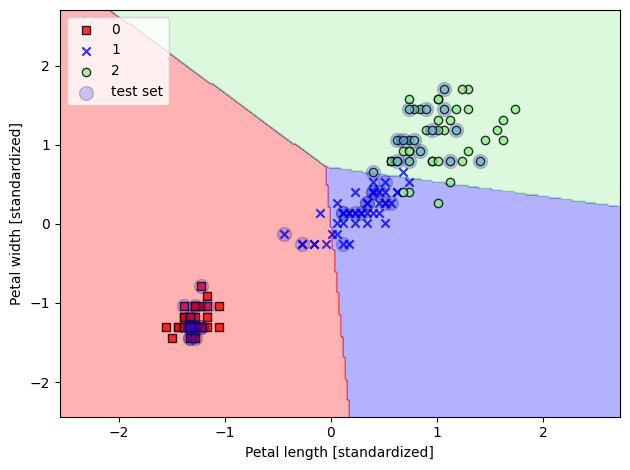

In [49]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=ppn,
                      test_idx=range(105,150))
plt.xlabel("Petal length [standardized]")
plt.ylabel("Petal width [standardized]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

#### Converting an Adaline implementation into an algorithm for logistic regression

C:\Users\Administrador\AppData\Local\Temp\ipykernel_4892\3660890556.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],


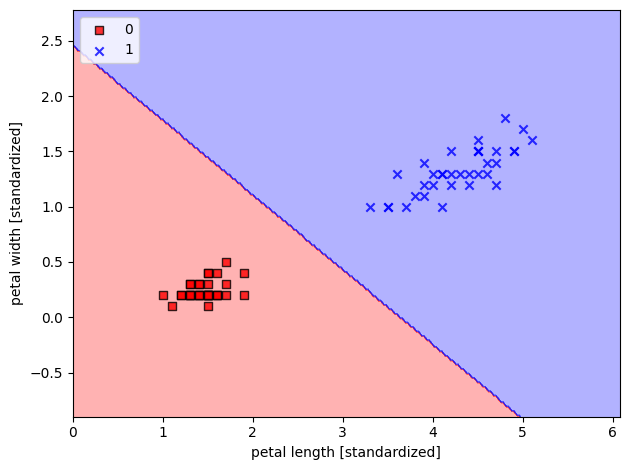

In [50]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05,
                            n_iter=1000,
                            random_state=1)

lrgd.fit(X_train_01_subset,
         y_train_01_subset)

plot_decision_regions(X=X_train_01_subset,
                      y=y_train_01_subset,
                      classifier=lrgd)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#### Training a logistic regression model with scikit-learn

c:\Users\Administrador\Desktop\Personal\Python-Machine-Learning---Raschka\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Administrador\AppData\Local\Temp\ipykernel_4892\3660890556.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],


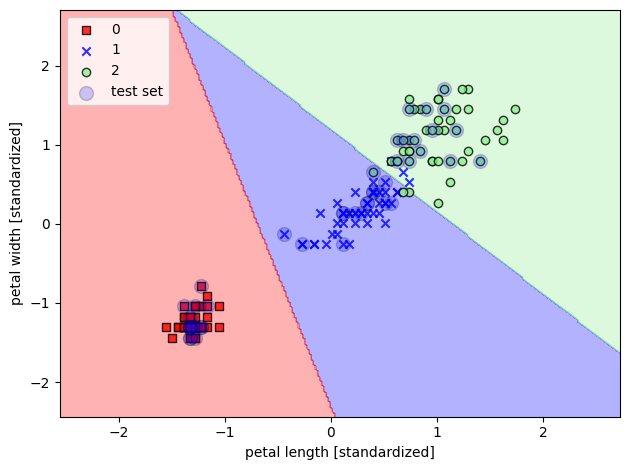

In [51]:
lr = LogisticRegression(C=100.0, random_state=1,
                        solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=lr,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [52]:
lr.predict_proba(X_test_std[:3, :])

array([[6.63770505e-09, 1.44747233e-01, 8.55252760e-01],
       [8.34031210e-01, 1.65968790e-01, 3.20815954e-13],
       [8.48822884e-01, 1.51177116e-01, 2.57998350e-14]])

In [53]:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

In [54]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

In [55]:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

#### Tackling overfitting via regularization (Página 75)

Se itera sobre los valores entre -5 y 5 evaluando en cada uno de ellos un modelo de regresión logística (todos los demás hiperparámetros permanecen iguales en cada iteración).
Con el metodo .coef_[1] obtenemos los coeficientes (pesos) que se asignan a las caracteristicas en el modelo entrenado.

c:\Users\Administrador\Desktop\Personal\Python-Machine-Learning---Raschka\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Administrador\Desktop\Personal\Python-Machine-Learning---Raschka\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Administrador\Desktop\Personal\Python-Machine-Learning---Raschka\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its d

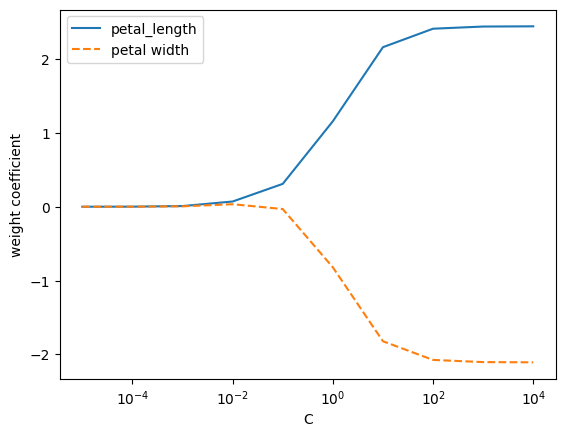

In [56]:
weights, params = [], []

for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1,
                            solver='lbfgs', multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)

plt.plot(params, weights[:, 0],
         label='petal_length')
plt.plot(params, weights[:, 1],
         linestyle='--', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

El gráfico muestra que los coeficientes de peso se reducen si disminuimos el hiperparámetro C, es decir, si aumentamos la fuerza de regularización.

## Support Vector Machines

C:\Users\Administrador\AppData\Local\Temp\ipykernel_4892\3660890556.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],


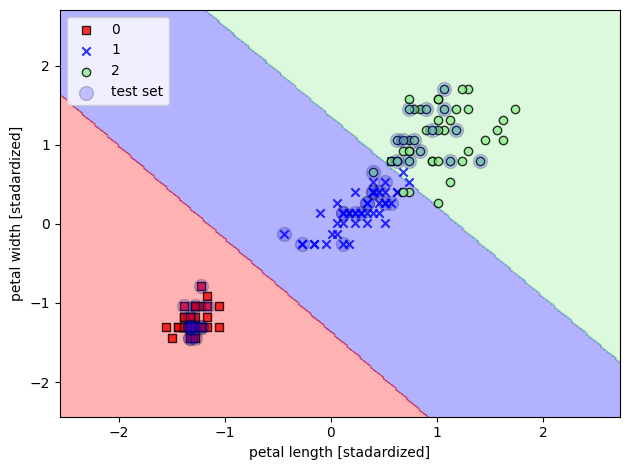

In [57]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('petal length [stadardized]')
plt.ylabel('petal width [stadardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Alternative implementations in scikit-learn (Página 83)

In [58]:
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss = 'hinge')

## Kernel methods for linearly inseparable data

Crearemos un conjunto de datos simple con la forma de una puerta XOR utilizando la función 'logical_or' de NumPy, donde 100 muestras se asignarán a la clase 1 y las otras 100 a la clase -1 

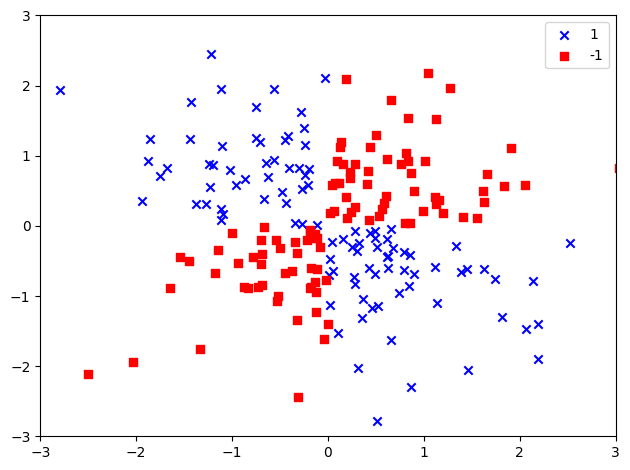

In [59]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, -1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### Kernel Trick (Página 87)

C:\Users\Administrador\AppData\Local\Temp\ipykernel_4892\3660890556.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],


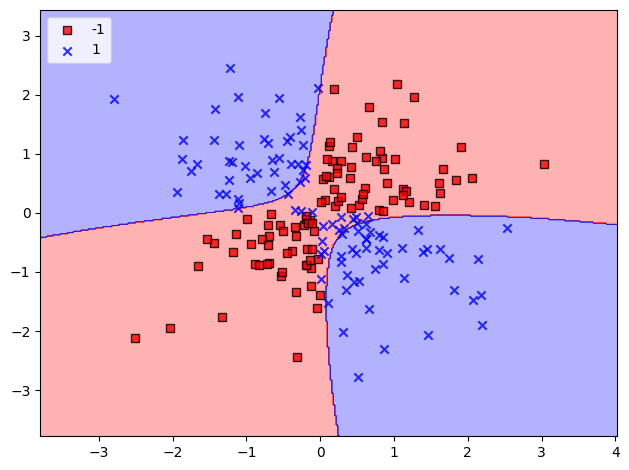

In [60]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\Administrador\AppData\Local\Temp\ipykernel_4892\3660890556.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],


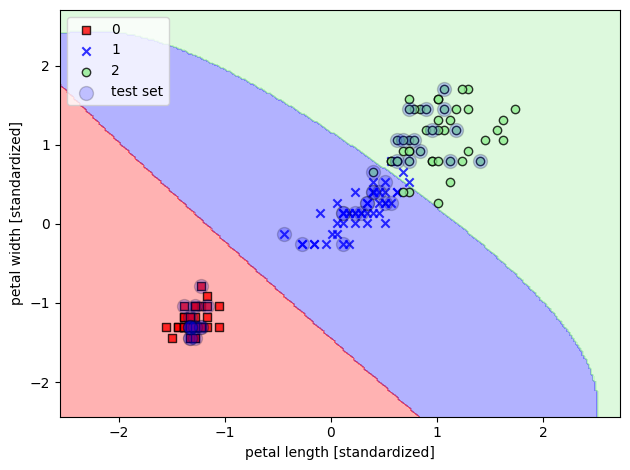

In [61]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Ahora, incrementemos el valor de γ y observemos el efecto sobre la frontera de decisión.

C:\Users\Administrador\AppData\Local\Temp\ipykernel_4892\3660890556.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],


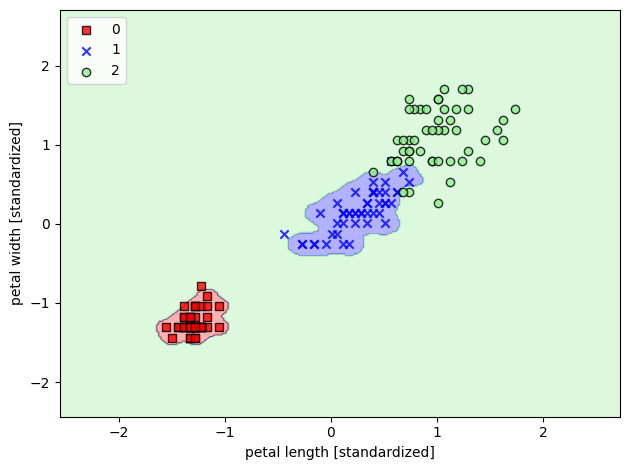

In [62]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105,100))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Un valor tan alto para γ lo que termina por producir es un sobreajuste del modelo.

### Maximizing IG - getting the most bang for your buck

Para una comparación más visual de los tres criterios de impureza (Entropía, impureza de Gini y classification error), vamos a plotear los indices de impureza para el rango de probabilidad $[0,1]$ para la clase 1. Note que añadiremos una version escalada de la entropia $(entropy/2)$ para observar que la impureza de Gini es una medida intermedia entre la entropía y el classification error.

Text(0, 0.5, 'impurity index')

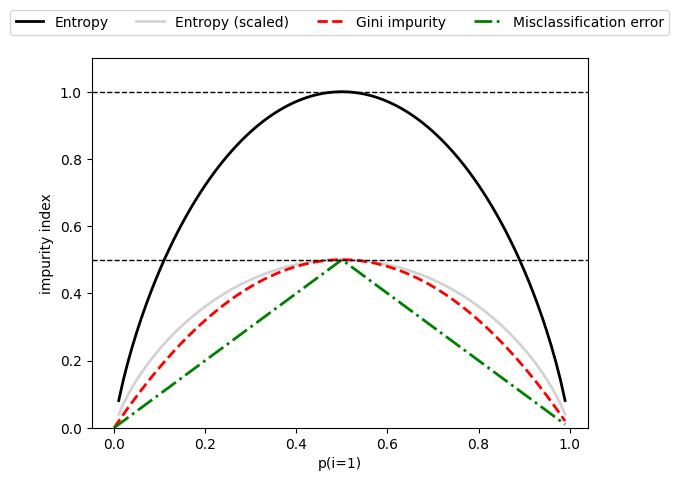

In [63]:
import matplotlib.pyplot as plt
import numpy as np

def gini(p):
    return (p)*(1-(p)) + (1-p)*(1-(1-p))

def entropy(p):
    return - p*np.log2(p) - (1-p)*np.log2((1-p))

def error(p):
    return 1 - np.max([p,1-p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)

for i, lab, ls, c in zip([ent, sc_ent, gini(x), err],
                         ['Entropy', 'Entropy (scaled)', 'Gini impurity', 'Misclassification error'],
                         ['-', '-', '--', '-.'],
                         ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')

### Building a decision tree (page 96)
Decision trees can buil complex decision boundaries by dividing the feature space into rectangles. However, we have to be careful since the deeper the decision tree, the more complex the decision boundary becomes, wich can easily result in overfitting.
Using scikit-learn, we will now train a decision tree with a maximum depth of 4, using Gini impurity as a criterion for impurity. Although feature scaling may be desired for visualization purposes, note that feature scaling is not a requirement for decision tree algorithms.

C:\Users\Administrador\AppData\Local\Temp\ipykernel_4892\3660890556.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],


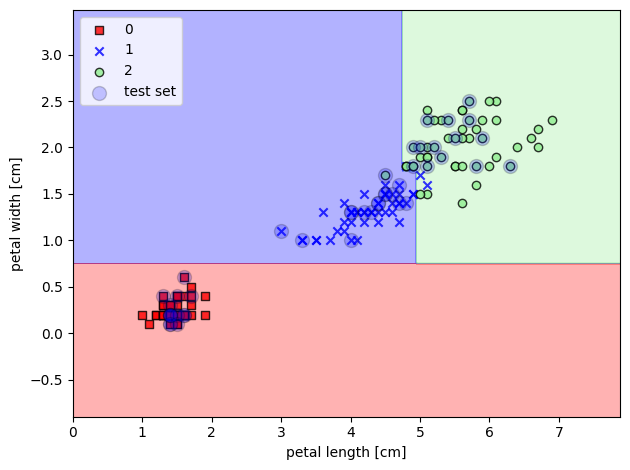

In [64]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='gini',
                                    max_depth=4,
                                    random_state=1)
tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined,
                      y_combined,
                      classifier=tree_model,
                      test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

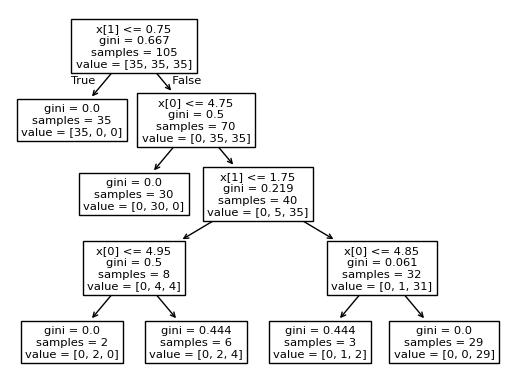

In [65]:
from sklearn import tree
tree.plot_tree(tree_model)
plt.show()

In [67]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree_model,
                           filled=True,
                           rounded=True,
                           class_names=['Setosa',
                                        'Versicolor',
                                        'Virginica'],
                           feature_names=['petal length',
                                          'petal width'],
                           out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png("tree.png")

### Combining multiple decision trees via random forests

C:\Users\Administrador\AppData\Local\Temp\ipykernel_4892\3660890556.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],


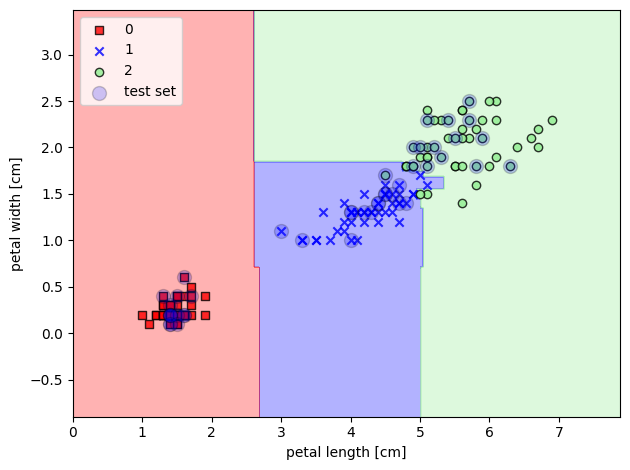

In [68]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini',
                                n_estimators=25,
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Con el código anterior, entrenamos un random forest con 25 árboles (parámetro ajustado en $n_estimators$) y utilizamos el impureza de Gini como criterio para separar los nodos. n_jobs nos permite ajustar el número de nucleos, de nuestro procesador, que utilizaremos para la ejecucion del modelo.

### K-nearest neighbors - a lazy (Perezoso) learning algorithm
By executing the following code, we will now implement a KNN model in scikit-learn using a **Euclidean** distance metric.

Aunque definimos el parámetro 'metric' como 'minkowski', el parámetro p es quien determina el tipo de metrica:
1. Si $p=1$ entonces la métrica es la de 'manhattan_distance (L1)', y 'euclidean_distance (L2)' para $p=2$. Para un valor arbitrario de p, se utiliza la distancia de Minkovski (Lp)

C:\Users\Administrador\AppData\Local\Temp\ipykernel_4892\3660890556.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],


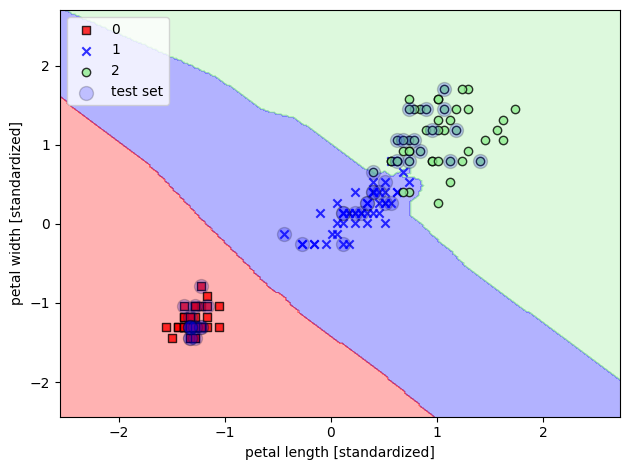

In [74]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,
                           p=2,
                           metric='minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=knn,
                      test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
